In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

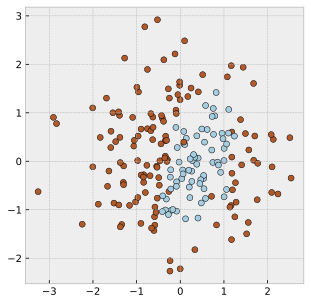

In [4]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]
def make_data():
    N = 200
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y
X, Y = make_data()


plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');
#dataset = pd.read_csv("data.csv")
#dataset

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1]


In [8]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res
degree=3
Poly_X=mapFeature(X[:, 0],X[:, 1],degree)
print(Poly_X)
print(Poly_X.shape)

[[ 1.00000000e+00  2.61808687e-01 -2.04327780e-01 ... -1.40054002e-02
   1.09304712e-02 -8.53065240e-03]
 [ 1.00000000e+00  2.53780222e+00 -3.46922612e-01 ... -2.23433430e+00
   3.05437943e-01 -4.17539745e-02]
 [ 1.00000000e+00  2.46607024e-01  1.51024228e+00 ...  9.18454213e-02
   5.62469130e-01  3.44460853e+00]
 ...
 [ 1.00000000e+00 -9.75477103e-01  1.32918443e-02 ...  1.26479286e-02
  -1.72340588e-04  2.34831167e-06]
 [ 1.00000000e+00  2.23769296e+00 -6.74782523e-01 ... -3.37881812e+00
   1.01889198e+00 -3.07249706e-01]
 [ 1.00000000e+00  1.24015578e+00  5.19156350e-01 ...  7.98455384e-01
   3.34250898e-01  1.39924741e-01]]
(200, 10)


In [9]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)


# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [10]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [11]:
def gradients(X, A, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [12]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

In [19]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

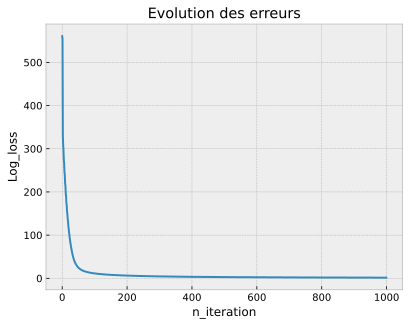

In [21]:
W,b=regression_logistique(Poly_X, Y)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = predict(Poly_X, W, b)
print(Y.shape,y_pred.shape)
#print("Accuracy=",np.round(accuracy_score(Y, y_pred)*100),'%')

(200,) (200, 200)
